# 信号处理仿真与应用 - 数字和模拟滤波器取 - 数字滤波器分析

## stepz

#### 滤波器阶跃响应

**给出python函数**

In [1]:
import numpy as np
from scipy.signal import lfilter, sosfilt, butter, ellip
from impzlength import impzlength
import matplotlib.pyplot as plt

def stepz(b, *args):
    # Determine if b represents a transfer function or an SOS matrix
    if b.ndim == 1 or b.shape[1] == 1:
        isTF = True
    else:
        isTF = False

    # Process optional arguments
    if len(args) > 0:
        a = args[0]
    else:
        a = np.ones_like(b)

    if len(args) > 1:
        n = int(args[1])
    else:
        n =  None

    if len(args) > 2:
        Fs = float(args[2])
    else:
        Fs = 1.0

    # Compute time vector
    if n is None:
        # Determine the length if not specified
        if isTF:
            N = impzlength(b, a)
        else:
            N = impzlength(b)
        M=0
    elif isinstance(n, (list, np.ndarray)) and len(n) > 1:
        # Vector of indices
        NN = np.round(n).astype(int)
        N = max(NN) + 1
        M = min(NN)
    else:
        # Single value of N
        N = int(n)
        M = 0

    tf = np.arange(M, N) / Fs

    # Form input vector
    x = np.ones_like(tf)

    if isTF:
        sf = lfilter(b, a, x)
    else:
        sf = sosfilt(b, x)

    if isinstance(n, (list, np.ndarray)) and len(n) > 1:
        s = sf[NN - M]
        t = tf[NN - M]
    else:
        s = sf
        t = tf
    # Plotting example using matplotlib
    plt.stem(t, s)
    plt.xlabel('n(Samples)')
    plt.ylabel('Amplitude')
    plt.title('Step Response')
    plt.grid(True)
    plt.show()
    return s, t

**采用文件调用**

示例1

创建一个标准化半功率频率为0.4πrad/sample的三阶巴特沃斯滤波器。显示其阶跃响应。

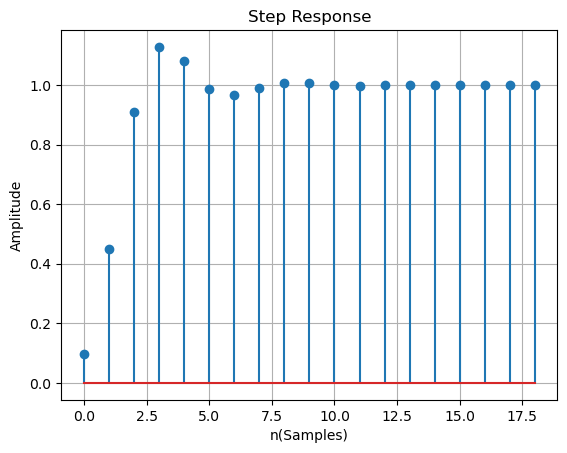

In [2]:
import numpy as np
from scipy.signal import lfilter, sosfilt, butter, ellip
from impzlength import impzlength
import matplotlib.pyplot as plt
from stepz import stepz

# 示例1
# 设计三阶巴特沃斯低通滤波器
order = 3  # 滤波器阶数
cutoff_freq = 0.4  # 截止频率
b, a = butter(order, cutoff_freq, btype='low')  # 设计低通滤波器
s,t = stepz(b, a)

**采用文件调用**

示例2

设计一个归一化通带频率为0.4πrad/sample的四阶低通椭圆滤波器。指定0.5 dB的通带纹波和20 dB的阻带衰减。绘制滤波器阶跃响应的前50个样本。

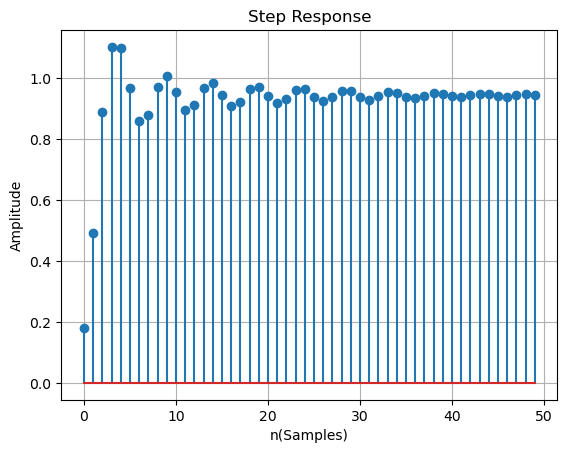

In [3]:
import numpy as np
from scipy.signal import lfilter, sosfilt, butter, ellip
from impzlength import impzlength
import matplotlib.pyplot as plt
from stepz import stepz

# 示例2
# 设计椭圆低通滤波器
N = 4  # 滤波器阶数
rp = 0.5  # 通带最大允许波纹（dB）
rs = 20  # 阻带最小衰减（dB）
cutoff = 0.4  # 截止频率（归一化频率，范围为0到1）
# 设计椭圆滤波器
b, a = ellip(N, rp, rs, cutoff, output='ba')
N=50
s,t = stepz(b, a, 50)